In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [43]:
data = pd.read_excel(r"C:\Users\Dell\Downloads\Data_Train.xlsx")

In [44]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [45]:
data.shape

(10683, 11)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [47]:
data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [48]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [49]:
data.dropna(inplace=True)

In [50]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [51]:
data.shape

(10682, 11)

### EDA

From description we can see that Date_of_Journey, Dep_Time, Arrival_Time and Duration are in object datatype, therefore we need
to extract them into integer.

In [52]:
#Extracting day from Date_of_Journey
data["Journey_day"] = pd.to_datetime(data.Date_of_Journey, format = "%d/%m/%Y").dt.day

In [53]:
#Extracting month from Date_of_Journey
data["Journey_month"] = pd.to_datetime(data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [54]:
#Dropping Date_of_Journey as it is not required
data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [55]:
#Extracting hour from Dep_time
data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour

In [56]:
#Extracting minute from Dep_time
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute

In [57]:
#Droping Dep_time as it is not required
data.drop(["Dep_Time"], axis = 1, inplace = True)

In [58]:
#Extracting hour from Arrival_time
data["Arrival_hour"] = pd.to_datetime(data["Arrival_Time"]).dt.hour

In [59]:
#Extracting minute from Arrival_time
data["Arrival_min"] = pd.to_datetime(data["Arrival_Time"]).dt.minute

In [60]:
#Dropping Arrival_time as it is not required
data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [61]:
#Extracting hours and minutes from duration
duration = list(data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [62]:
data["Duration_hours"] = duration_hours
data["Duration_mins"] = duration_mins

In [63]:
#Dropping duration as it is not required
data.drop(["Duration"], axis = 1, inplace = True)

In [64]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [65]:
# Since Route and Total_Stops serve the same purpose we can drop the route column
data.drop(["Route"], axis = 1, inplace = True)

In [66]:
data["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [67]:
# As we can see Additional_info contains 80% no info so we can drop it
data.drop(["Additional_Info"], axis = 1, inplace = True)

In [68]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


### Handling Categorical Data

In [69]:
data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

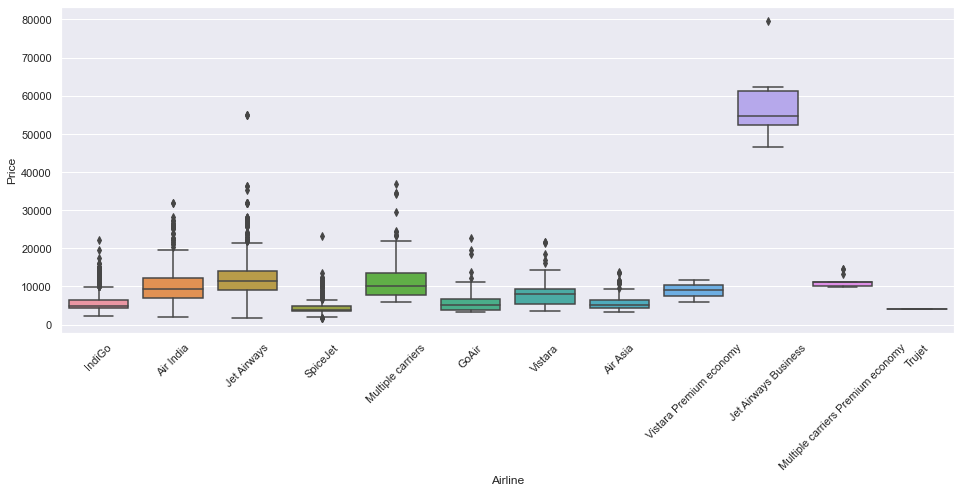

In [70]:
plt.figure(figsize=(16,6))
sns.boxplot(x="Airline", y="Price", data=data)
plt.xticks(rotation=45)
plt.show()

In [71]:
# As Airline is Nominal Categorical Data we will use OneHotEncoding
Airline = data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [72]:
data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

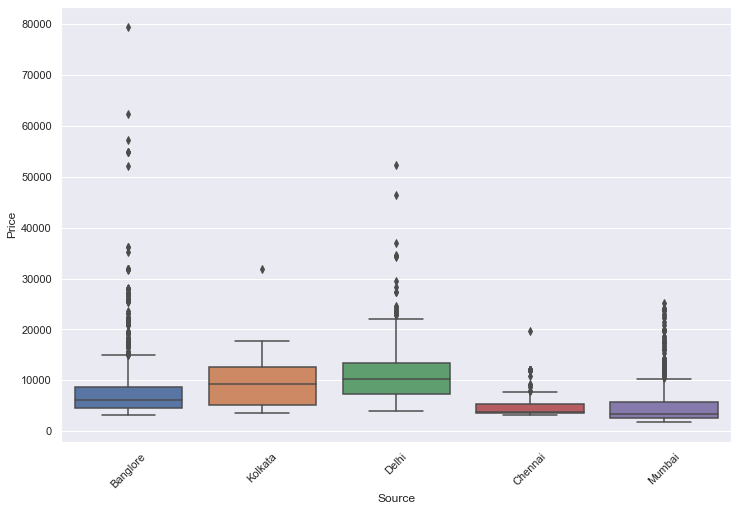

In [73]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Source", y="Price", data=data)
plt.xticks(rotation=45)
plt.show()


In [74]:
# Source is nominal categorical data so we will use OneHotEncoding
Source = data[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [75]:
data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [76]:
# Destination is nominal categorical data so we will use OneHotEncoding
Destination = data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first= True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [77]:
data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [78]:
data.replace({"non-stop": 0, "1 stop":1 , "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [79]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [41]:
# Concatenate dataframe
data1 =pd.concat([data, Airline, Source, Destination], axis = 1)

In [80]:
data1.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [81]:
data1.drop(["Airline","Source","Destination"], axis = 1, inplace = True)

In [82]:
data1.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [83]:
data1.shape

(10682, 30)

### Creating X and Y

In [84]:
data1.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [85]:
X = data1.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [86]:
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [87]:
Y = data1.iloc[:,1]

In [88]:
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [89]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,Y)

ExtraTreesRegressor()

In [90]:
print(selection.feature_importances_)

[2.37356527e-01 1.44568886e-01 5.25448044e-02 2.40218924e-02
 2.11371935e-02 2.77048194e-02 1.90898022e-02 1.27411345e-01
 1.77675251e-02 9.87693380e-03 2.26136297e-03 1.86599364e-02
 1.35315022e-01 6.68644367e-02 1.87807697e-02 8.32282944e-04
 3.06955189e-03 1.09882402e-04 5.04873166e-03 7.53744549e-05
 5.31205858e-04 8.99429068e-03 3.50524154e-03 6.00112414e-03
 7.78349722e-03 9.42031928e-03 5.87433548e-03 5.03909484e-04
 2.48889967e-02]


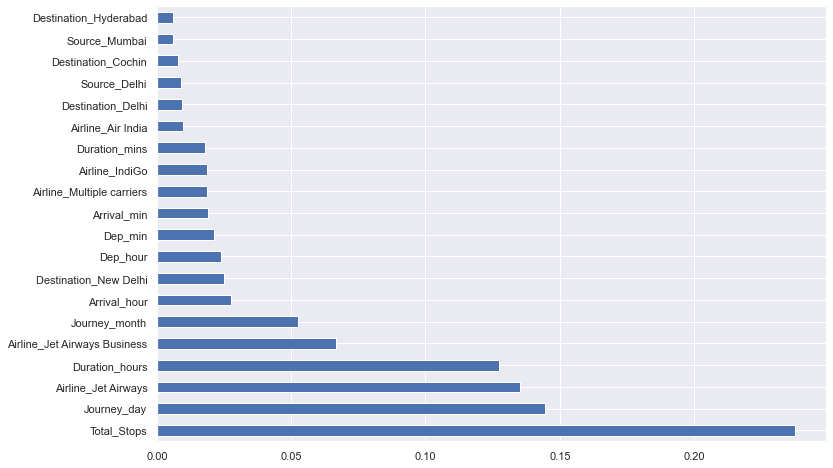

In [91]:
# Plot of important features

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind="barh")
plt.show()

### Train Test Split

### Linear regression

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [100]:
from sklearn.linear_model import LinearRegression
# create a model object
lm = LinearRegression()
#train the model object
lm.fit(X_train, Y_train)
#print intercept and coefficient
print(lm.intercept_)
print(lm.coef_)

7182.166036274133
[ 2.70176324e+03 -7.44007516e+01 -3.79944721e+02  2.04176050e+01
 -2.14271397e+00 -1.06424243e+01  2.26315529e+00  5.77223522e+00
 -1.79785164e+00  1.57734736e+03  1.66715313e+01  2.54898181e+02
  4.33368673e+03  4.81079210e+04  3.71246083e+03  4.28168357e+03
 -2.76942789e+02  1.45519152e-11  2.11858727e+03  2.91737623e+03
 -1.24374533e+01  1.43915824e+01 -7.97291622e+01 -8.71478720e+02
  1.43915824e+01 -8.66665862e+02 -8.71478720e+02 -1.24374533e+01
  1.81591961e+03]


In [101]:
#predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)

[11333.60056411 14029.06651562  3982.99206547 ...  9897.89928233
  9711.96800143  3841.39898473]


In [102]:
lm.score(X_train, Y_train)

0.6210470806781494

In [103]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.6311526877438266
RMSE: 2899.773536876402
Adj R-square: 0.6301485033601025


In [111]:
from sklearn.linear_model import Ridge
lm = Ridge()
lm.fit(X_train, Y_train)

Ridge()

In [112]:
Y_pred=lm.predict(X_test)

In [113]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test, Y_pred)
print(r2)
rmse=np.sqrt(mean_squared_error(Y_test, Y_pred))
print(rmse)
adjusted_r_squared = 1- (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.6287057459817706
2909.376220087012
0.6276948998151795


In [114]:
from sklearn.linear_model import Lasso
lm = Lasso()
lm.fit(X_train, Y_train)
#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

7346.28888004633
[ 2.70901815e+03 -7.46627908e+01 -3.83942321e+02  1.99209442e+01
 -2.60288674e+00 -1.03852169e+01  2.02789119e+00  6.47429458e+00
 -2.00457673e+00  1.34931735e+03 -1.31782889e+02  4.21663014e+01
  4.11381842e+03  4.57553039e+04  3.48482311e+03  3.34775626e+03
 -4.66312669e+02  0.00000000e+00  1.88112826e+03  0.00000000e+00
  0.00000000e+00  1.04438435e+02 -0.00000000e+00 -1.53667838e+03
  5.55158344e+00 -7.68794505e+02 -9.38780311e+01  4.77436269e+01
  1.89864782e+03]


In [115]:
Y_pred=lm.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test, Y_pred)
print(r2)
rmse=np.sqrt(mean_squared_error(Y_test, Y_pred))
print(rmse)
adjusted_r_squared = 1- (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.6311908602157804
2899.623482389925
0.6301867797563604


### Gradient Boost

In [116]:
from sklearn.ensemble import GradientBoostingRegressor

model_GradientBoosting = GradientBoostingRegressor(n_estimators=300,random_state=10)
model_GradientBoosting.fit(X_train, Y_train)
Y_pred=model_GradientBoosting.predict(X_test)

In [117]:
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error
print("MSE:",metrics.mean_squared_error(Y_test, Y_pred))
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

MSE: 4353053.373699638
R-squared: 0.8090531708426724
Adj R-square: 0.8085333193551054


### Creating the model using Random Forest

In [104]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
reg_rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [105]:
Y_pred = reg_rf.predict(X_test)

In [106]:
reg_rf.score(X_train, Y_train)

0.8820125492846592

In [107]:
reg_rf.score(X_test, Y_test)

0.8299227562727736

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


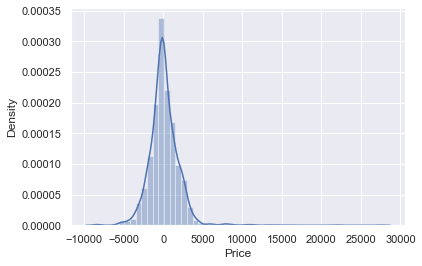

In [108]:
sns.distplot(Y_test-Y_pred)
plt.show()

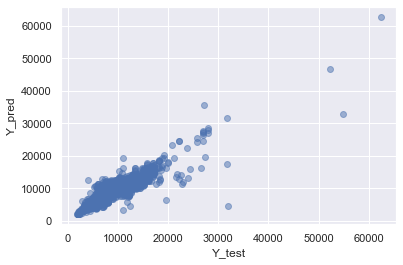

In [109]:
plt.scatter(Y_test, Y_pred, alpha = 0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.show()

In [110]:
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error
print("MSE:",metrics.mean_squared_error(Y_test, Y_pred))
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

MSE: 3877285.2257543085
R-squared: 0.8299227562727736
Adj R-square: 0.8294597220943949


In [120]:
from sklearn.model_selection import RandomizedSearchCV

In [121]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [122]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [123]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2)

In [124]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=  14.4s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=  13.5s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=  13.7s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=  13.7s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=  13.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   4.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   4.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estima

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=10,
                                                   random_state=42),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [125]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 25}

In [126]:
prediction = rf_random.predict(X_test)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


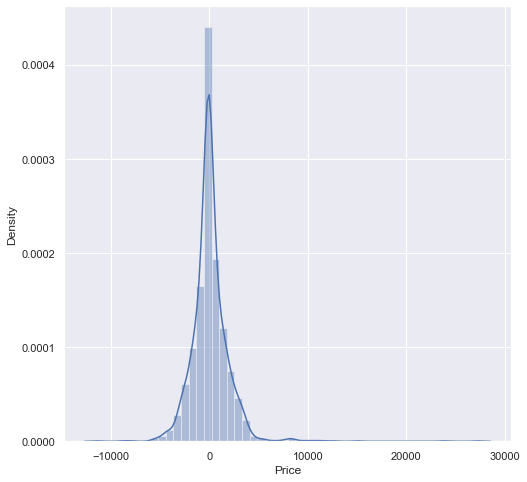

In [128]:
plt.figure(figsize = (8,8))
sns.distplot(Y_test-prediction)
plt.show()

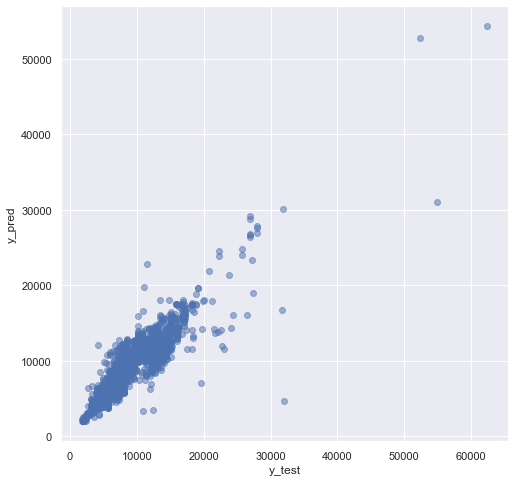

In [130]:
plt.figure(figsize = (8,8))
plt.scatter(Y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [132]:
print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE: 1199.2415778101738
MSE: 3801691.835582876
RMSE: 1949.7927673429492


In [133]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [135]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [136]:
y_prediction = forest.predict(X_test)

In [138]:
metrics.r2_score(Y_test, y_prediction)

0.8299227562727736